# Fashin MNIST Dataset

## Importing the libraries

In [89]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import optimizers

## Loading the data

In [90]:
df_train=pd.read_csv('fashion-mnist_train.csv')
df_test=pd.read_csv('fashion-mnist_test.csv')

In [91]:
df_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [92]:
df_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Data extraction

Here, I have transposed the dataset so that it is easier to extract the labels. I have simultaneously performed the same operations on the test labels as well.

In [93]:
labels=df_train['label']
labels1=df_test['label']

In [94]:
labels=np.array(labels)
labels1=np.array(labels1)
labels

array([2, 9, 6, ..., 8, 8, 7], dtype=int64)

I have made a dictionary where keys are the output labels and the values are the name of the object. We will use this in the code later on.

In [95]:
dict={0:"T-shirt/top",1:"Trouser",2:"Pullover",3:"Dress",4:"Coat",5:"Sandal",6:"Shirt",7:"Sneaker",8:"Bag",9:"Ankle boot"}

In [96]:
imgs=df_train.drop('label',axis=1)
imgs1=df_test.drop('label',axis=1)

In [97]:
imgs.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,5,0,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,1,2,0,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Here, I have again used tranpose() on the dataframe where I have removed the labels.

In [98]:
imgs= imgs.transpose()
imgs1=imgs1.transpose()
imgs.head()

,0,1,2,3,4,5,6,7,8,9,...,59990,59991,59992,59993,59994,59995,59996,59997,59998,59999
pixel1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
pixel2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
pixel3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
pixel4,0,0,0,1,0,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
pixel5,0,0,0,2,0,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [99]:
print(imgs.shape)
print(imgs1.shape)

(784, 60000)
(784, 10000)


Below I have used a function where I have iterated over the dataframe and obtained the pixel values in the numpy array arr.<br>
After that, I have rearranged the numpy array in 28x28, same as the dimension of the image.<br>
Now the reshaped array is appended over a new array a. I have followed similar steps for the test data as well.

In [100]:
a=[]
for i in range(imgs.shape[1]):
# for i in range(4):
    arr=np.array(imgs[i])
    arr=np.reshape(arr,(28,28))
    a.append(arr)
#     print(arr)

In [101]:
b=[]
for i in range(imgs1.shape[1]):
# for i in range(4):
    arr=np.array(imgs1[i])
    arr=np.reshape(arr,(28,28))
    b.append(arr)
#     print(arr)

In [102]:
a=np.array(a)
b=np.array(b)
print(a.shape)
print(b.shape)

(60000, 28, 28)
(10000, 28, 28)


Below I have tested that my function above was correct or not.<br>
I have printed the pixel values, the image and its output label and the type of object with the help of the dictionary I had created before.

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   1   0   0   0   0  81  21   0   1   0   1   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0  14 200  49   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   2   1   1   1   0   1   0   0   0 162 184 165  20   0   1   1   3   4   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   1   2   0   2   0 120 183 154 20

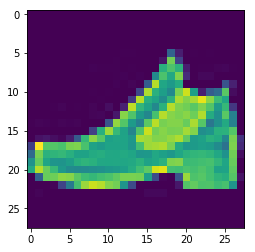

In [103]:
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt
plt.imshow(a[1])
print(a[1])
print(labels[1],":",dict[labels[1]])

[[  0   0   0   0   2   0   0   0   0   0  22 198 207 165  98 163 220 151   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0   5  56  93 116  80 168 245 255 229 251 231 104 104 111  91  42   0   0   0   0   0   0]
 [  0   0   0   0   0  41 117 100  85  80  68  49 112 182 217 172  71  55  75  84  95 115 107   0   0   0   0   0]
 [  0   0   0   0   9 100  72  63  75  75  73  64  41  23  18  28  49  73  78  76  71  69 100  69   0   0   0   0]
 [  0   0   0   0  49  97  69  73  75  73  73  75  77  78  78  80  77  73  76  76  75  76  77 104   2   0   0   0]
 [  0   0   0   0  76  89  77  73  76  73  73  73  73  73  73  75  75  72  76  77  75  80  84 103  29   0   0   0]
 [  0   0   0   2  94  88  82  80  66  66  62  66  68  68  66  64  64  63  71  78  80  81  94 108  36   0   0   0]
 [  0   0   0  23  95  84 100  67  99  97  63 103  53  88  69  98 121  85  60  58  64  90 116  99  59   0   0   0]
 [  0   0   0  75  89  75 115 102  91  91 141 166 130 165 124 135 130 143 170 14

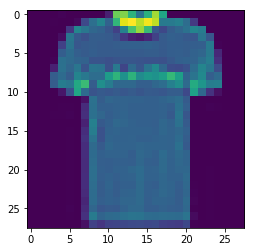

In [104]:
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt
plt.imshow(b[420])
print(b[420])
print(labels1[420],":",dict[labels1[420]])

I have renamed the following so that it becomes more intuitive for the veiwers.

In [105]:
training_images=a
test_images=b
training_labels=labels
test_labels=labels1

I have normalized the images data by dividing the array by 255 as there are 256 different pixel values and the maximum pixel value will be 255 (as 0 is included).<br>
We have to reshape the images as all of them are grayscale.

In [117]:
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0

## Model Fitting

This is the CNN model where I have used 1 convolutional layer which applies filter in the images and hence accentuates many features, (3,3) represents the matrix size here. We can also observe the change in the input size of the image after convolution layer is applied as when the filter is applied, the corner pixels from each sides are removed.<br>
After convolution, pooling layer is applied which halves the pixel size without any significant reduction in the features of the image.<br>
Flatten layer changes the dimensions to 1D. This is done because vectors are always easier to handle.<br>
A dense neural network is applied having rectified linear activation function.<br>
And then output layer having 10 neurons is applied as there are 10 output labels. The softmax function calculates the probability and the one having highest probability is activated.

In [111]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

The optimizer used here is Adam which is fast and efficient and the loss function as sparse categorical crossentropy.

In [114]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])


Epoch 1/5
60000/60000 [==============================] - 95s 2ms/sample - loss: 0.3811 - acc: 0.86500s - loss: 0.3812 - acc: 0.8
Epoch 2/5
60000/60000 [==============================] - 90s 1ms/sample - loss: 0.2599 - acc: 0.90542s
Epoch 3/5
60000/60000 [==============================] - 95s 2ms/sample - loss: 0.2156 - acc: 0.9215
Epoch 4/5
60000/60000 [==============================] - 101s 2ms/sample - loss: 0.1802 - acc: 0.9330
Epoch 5/5
60000/60000 [==============================] - 103s 2ms/sample - loss: 0.1529 - acc: 0.9433


In [116]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 10816)             0         
_________________________________________________________________
dense_20 (Dense)             (None, 128)               1384576   
_________________________________________________________________
dense_21 (Dense)             (None, 10)                1290      
Total params: 1,386,506
Trainable params: 1,386,506
Non-trainable params: 0
_________________________________________________________________


## Evaluation Metrics

In [115]:
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 10s 977us/sample - loss: 0.2335 - acc: 0.9193


[0.23351502041220665, 0.9193]